<a href="https://colab.research.google.com/github/ansehoon1999/hands-on_practice/blob/main/14_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_sample_image

import tensorflow as tf
from tensorflow import keras

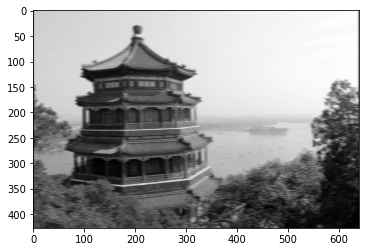

In [9]:
import numpy as np
import matplotlib.pylab as plt
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg") / 255
image = np.array([china, flower])
batch_size, height, width, channels = image.shape

filters = np.zeros(shape=(7,7, channels, 2), dtype = np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

output = tf.nn.conv2d(image, filters, strides=1, padding="SAME")
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

#ResNet

In [ ]:
class ResidualUnit(keras.layers.Layer):
  def __init__ (self,filters, strides= 1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activation.get(activation)
    self.main_layers[
                     keras.layers.Conv2D(filters, 3, strides =strides, padding="same", use_bias = False),
                     keras.layers.BatchNormalization(),
                     self.activation,
                     keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias = False),
                     keras.layers.BatchNormalization()]
    self.skip_layers = []
    if strides > 1 :
      self.skip_layers =[
                        keras.layers.Conv2D(filters, 1, strides = strides, padding="same", use_biase = False)
                        keras.layers.BatchNormalization()]
  def call(self, inputs) :
    Z= inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip layers:
      skip_Z = layer(skip_Z)
    return self.activation(Z + skip_Z)
    

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3], padding="same", use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3 :
  strides = 1 if filters = prev_filters else 2
  model.add(ResidualUnit(filters, strides = strides))
  prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")
images_resized = tf.image.resize(images, [244,244])

inputs = keras.application.resent50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

top_K = keras.application.resent50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)) :
  print("이미지 #{}".format(image_index))
  for class_id, name, y_proba in top_K[image_index] :
    print(" {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
  print()